In [2]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
roboflow_API = user_secrets.get_secret("roboflow")

In [3]:
!pip install roboflow
!pip install supervision

from roboflow import Roboflow
import supervision as sv
import cv2
import numpy as np
import os
import math
import matplotlib.pyplot as plt
       
class FindTree:
    def __init__(self, confidence=40, showAllTrees=False) -> None:
        rf = Roboflow(api_key=roboflow_API)
        project = rf.workspace().project("tree-detection-ekaot")
        self.model = project.version(1).model
        self.confidence = confidence
        self.showAllTrees = showAllTrees

    def process(self, image_location):
        # result = self.model.predict(image_location, confidence=self.confidence).json()
        result = self.model.predict(image_location, confidence=self.confidence, overlap=30).json()

        labels = [item["class"] for item in result["predictions"]]

        detections = sv.Detections.from_inference(result)

        return detections, labels


    def process_show(self, image_location):

        [detections, labels] = self.process(image_location)

        label_annotator = sv.LabelAnnotator()
        mask_annotator = sv.MaskAnnotator()

        image = cv2.imread(image_location)
        annotated_image = mask_annotator.annotate(
            scene=image, detections=detections)
        annotated_image = label_annotator.annotate(
            scene=annotated_image, detections=detections, labels=labels)

        sv.plot_image(image=annotated_image, size=(16, 16))

    def RemoveBackground(self, image, detections):

        black_image = np.zeros_like(image)

        # only get the first tree
        if not self.showAllTrees:
            detections.xyxy = [detections.xyxy[0]]

        for detection in detections.xyxy:
            y_min = int(min(detection[1], detection[3]))
            y_max = int(max(detection[1], detection[3]))
            x_min = int(min(detection[0], detection[2]))
            x_max = int(max(detection[0], detection[2]))
            black_image[y_min:y_max, x_min:x_max] = image[y_min:y_max, x_min:x_max]
        
        return black_image
    
    def RemoveBackground_Show(self, image_location):

        [detections, labels] = self.process(image_location)

        if detections.xyxy is None:
            print("No tree found")
            return
        image = cv2.imread(image_location)

        masked_image = self.RemoveBackground(image, detections)

        plt.imshow(masked_image)


    def RemoveBackground_Save(self, image_location, save_location):

        [detections, labels] = self.process(image_location)

        if detections.xyxy is None:
            print("No tree found")
            return
        image = cv2.imread(image_location)

        masked_image = self.RemoveBackground(image, detections)

        cv2.imwrite(save_location, masked_image)

# Test

loading Roboflow workspace...
loading Roboflow project...


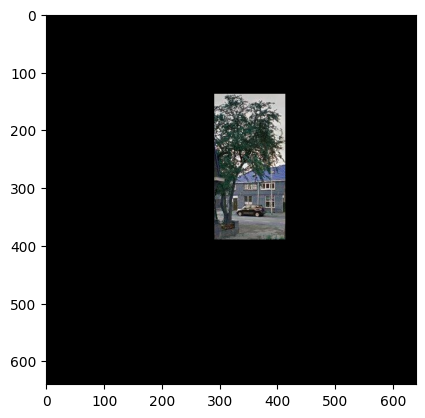

In [4]:
    image_path = "/kaggle/input/datasettrees/Dood/10328_52.0094194.348735202.397706.jpg"
    ft = FindTree()
    ft.RemoveBackground_Show(image_path)
#     ft.process_show(image_path)
#     ft.RemoveBackground_Save(image_path, "masked_image.jpg")


In [ ]:
# photo_folder = "/kaggle/input/dummydataset/Goed"
# output_folder = "/kaggle/working/Goed"

dataset_input_folder = "/kaggle/input/datasettrees"
dataset_output_folder = "/kaggle/working/datasettrees"

ft = FindTree(confidence=20, showAllTrees=False)

# Count total files to count progress only .jpg files
files = [f for _, _, files in os.walk(dataset_input_folder) for f in files if f.endswith('.jpg')]
total_files = sum([len(files)])
processed_files = 0
old_progress = 0

for photo_folder_for in os.listdir(dataset_input_folder):

    # make sure the folder structure is the same
    photo_folder = os.path.join(dataset_input_folder, photo_folder_for)
    output_folder = os.path.join(dataset_output_folder, photo_folder_for)


    # check if the folder is a directory
    if not os.path.isdir(photo_folder):
        continue

    # create output folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(photo_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(photo_folder, filename)
            try:
                ft.RemoveBackground_Save(image_path, os.path.join(output_folder, filename))
            except:
                print("Error processing", image_path)
            processed_files += 1
            progress = math.ceil((processed_files / total_files) * 100)
            if not (progress == old_progress):
                print(f"Progress: {progress}%")
            old_progress = progress

loading Roboflow workspace...
loading Roboflow project...
Progress: 1%
Error processing /kaggle/input/datasettrees/Slecht/14920_52.0168494.356617147.630064.jpg
Error processing /kaggle/input/datasettrees/Slecht/3282_51.9935914.338683186.736203.jpg
Error processing /kaggle/input/datasettrees/Slecht/19246_52.004724.36584850.591408.jpg
Error processing /kaggle/input/datasettrees/Slecht/7523_51.9810564.345969324.600813.jpg
Progress: 2%
Error processing /kaggle/input/datasettrees/Slecht/23770_52.0203884.38484814.68333.jpg
Progress: 3%
Error processing /kaggle/input/datasettrees/Slecht/10981_51.9911374.35086483.639047.jpg
Error processing /kaggle/input/datasettrees/Slecht/19469_51.9922324.36861533.538433.jpg
Error processing /kaggle/input/datasettrees/Slecht/19487_51.9841374.367548134.425893.jpg
Error processing /kaggle/input/datasettrees/Slecht/11606_52.0071094.351567193.319475.jpg
Progress: 4%
Error processing /kaggle/input/datasettrees/Slecht/12017_52.0228674.351535249.515736.jpg
Error pr